In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('dark_background')

In [7]:
df = pd.read_csv("D:\Books\data\AirPassengers.csv")
print(df.dtypes)

Month         object
Passengers     int64
dtype: object


In [8]:
df['Month'] = pd.to_datetime(df['Month'])
print(df.dtypes)

Month         datetime64[ns]
Passengers             int64
dtype: object


In [9]:
df.head()




,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
df.set_index('Month', inplace=True) 

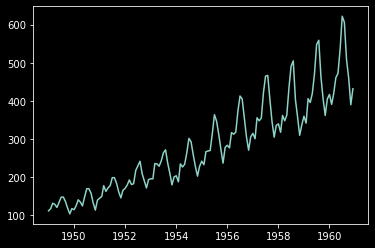

In [11]:
plt.plot(df['Passengers'])

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

pvalue =  0.991880243437641  if above 0.05, data is not stationary


In [14]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

<AxesSubplot:xlabel='month', ylabel='Passengers'>

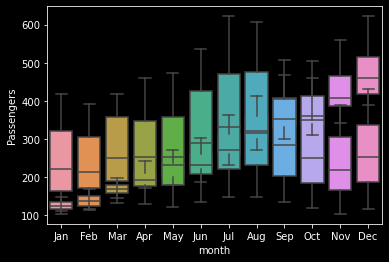

In [15]:
#Plot yearly and monthly values as boxplot
sns.boxplot(x='year', y='Passengers', data=df)
sns.boxplot(x='month', y='Passengers', data=df)

In [16]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['Passengers'],  
                            model ='additive')

In [17]:
trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid

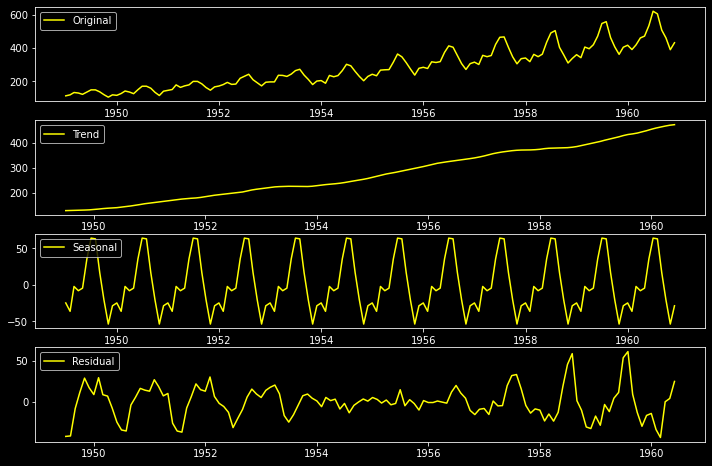

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Passengers'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

C:\Users\LAXITA\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

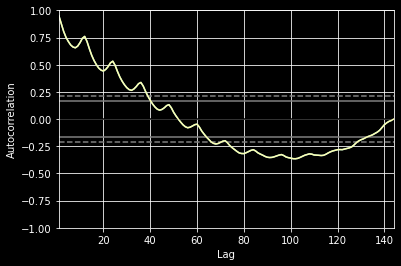

In [19]:

from statsmodels.tsa.stattools import acf

acf_144 = acf(df.Passengers, nlags=144)
plt.plot(acf_144)

#Obtain the same but with single line and more info...
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Passengers) 